In [242]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import rcParams
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [243]:
rcParams['figure.figsize']  = 16,5
rcParams['lines.linewidth'] = 2.8
rcParams['xtick.labelsize'] = 'medium'
rcParams['ytick.labelsize'] = 'medium'
rcParams['axes.grid'] = True
rcParams['grid.color'] = (0.9, 0.89, 0.88, 0.87)
rcParams['boxplot.flierprops.linewidth'] = 0.3
rcParams['boxplot.flierprops.markersize'] = 3
rcParams['boxplot.boxprops.linewidth'] = 0.3

plt.rc('axes',axisbelow=True)
plt.rc('axes.spines',top=False,bottom=False,left=False,right=False)
pd.set_option('display.max_columns',100)

In [244]:
df = pd.read_csv('https://raw.githubusercontent.com/hadimaster65555/dataset_for_teaching/main/dataset/bank_churn_dataset/bank_churn_data.csv')

X_train, X_test, y_train, y_test = train_test_split(df.drop('attrition_flag',axis=1),df.attrition_flag,test_size=0.2,random_state=0,stratify=df.attrition_flag)
df = pd.concat([X_train,y_train],axis=1)

In [245]:
df.head()

,user_id,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio,attrition_flag
839,710574558,47,M,4,Graduate,Single,$80K - $120K,Blue,41,5,3,2,26442.0,1642,24800.0,0.651,1403,40,0.429,0.062,Existing Customer
90,717539808,51,F,2,High School,Single,Less than $40K,Blue,36,3,2,2,9930.0,0,9930.0,0.731,1276,21,1.333,0.000,Existing Customer
8273,719926683,41,M,3,High School,Divorced,$60K - $80K,Blue,33,2,2,2,20749.0,2171,18578.0,0.842,4754,77,0.674,0.105,Existing Customer
5304,712549758,40,F,4,Graduate,Married,Unknown,Blue,25,6,2,1,25060.0,0,25060.0,0.758,3749,61,0.743,0.000,Existing Customer
7406,818993508,52,F,3,Graduate,Married,Less than $40K,Blue,47,4,4,2,2577.0,879,1698.0,0.740,5021,75,0.744,0.341,Existing Customer


In [246]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8101 entries, 839 to 10051
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   user_id                   8101 non-null   int64  
 1   customer_age              8101 non-null   int64  
 2   gender                    8101 non-null   object 
 3   dependent_count           8101 non-null   int64  
 4   education_level           8101 non-null   object 
 5   marital_status            8101 non-null   object 
 6   income_category           8101 non-null   object 
 7   card_category             8101 non-null   object 
 8   months_on_book            8101 non-null   int64  
 9   total_relationship_count  8101 non-null   int64  
 10  months_inactive_12_mon    8101 non-null   int64  
 11  contacts_count_12_mon     8101 non-null   int64  
 12  credit_limit              8101 non-null   float64
 13  total_revolving_bal       8101 non-null   int64  
 14  avg_o

In [247]:
df.duplicated().sum()

0

Dari informasi data di atas, terlihat tidak ada permasalahan *missing values*, tipe data, dan juga duplikasi

# 1

## 1.1. Usia nasabah

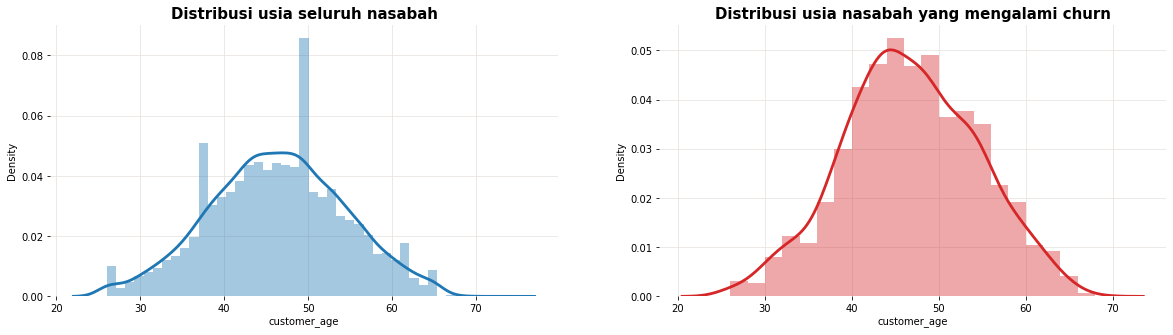

In [248]:
fig, ax = plt.subplots(1,2, figsize=(20,5))

sns.distplot(df.customer_age, color='tab:blue',ax=ax[0])
sns.distplot(df[df['attrition_flag']=='Attrited Customer'].customer_age, color='tab:red',ax=ax[1])

ax[0].set_title('Distribusi usia seluruh nasabah', size=15, fontweight=550)
ax[1].set_title('Distribusi usia nasabah yang mengalami churn', size=15, fontweight=550)


plt.show()

Sebagian besar nasabah berusia di rentang 40 hingga 52 tahun. Selain itu, nasabah yang banyak mengalami juga berada pada rentang usia tersebut ( 40 hingga 52 tahun )

## 1.2. Tingkat pendidikan dan Kategori penghasilan

In [249]:
print(df['education_level'].value_counts())
print('\n',df['income_category'].value_counts())

Graduate         2506
High School      1618
Unknown          1223
Uneducated       1212
College           780
Post-Graduate     410
Doctorate         352
Name: education_level, dtype: int64

 Less than $40K    2850
$40K - $60K       1442
$80K - $120K      1229
$60K - $80K       1130
Unknown            886
$120K +            564
Name: income_category, dtype: int64


Setelah dilihat nilai unique dari kedua kolom di atas, terdapat nilai **Unknown** yang mana mengindikasikan permasalahan missing values pada kedua kolom tersebut

In [250]:
print(df[df['education_level'] == 'Unknown'].shape[0]/df.shape[0])
print(df[df['income_category'] == 'Unknown'].shape[0]/df.shape[0])

0.1509690161708431
0.10936921367732379


Berhubung persentase missing values pada kedua kolom tersebut **kurang dari 15%**, kita akan men-*drop* sementara nilai tersebut untuk mencari tahu korelasi satu sama lain

In [251]:
import collections

edu_empty = collections.defaultdict(list)
inc_empty = collections.defaultdict(list)
attrition_empty = collections.defaultdict(list)

education_order = ['Uneducated', 'High School', 'Graduate', 'College', 'Post-Graduate', 'Doctorate']
income_order    = ['Less than $40K', '$40K - $60K', '$60K - $80K', '$80K - $120K', '$120K +']
attrition_order = ['Existing Customer','Attrited Customer']

edu_inc_df = df[(df['education_level']!='Unknown')&(df['income_category']!='Unknown')]

for n, level in enumerate(education_order):
    edu_empty[level].append(int(n))
    
for n, level1 in enumerate(income_order):
    inc_empty[level1].append(int(n))
    
for n, level2 in enumerate(attrition_order):
    attrition_empty[level2].append(int(n))
    
edu_inc_df.replace({
                    'education_level':edu_empty,
                    'income_category':inc_empty,
                    'attrition_flag':attrition_empty
                   },inplace=True)

In [252]:
edu_inc_df[['education_level','income_category','attrition_flag']].corr(method='spearman')

,education_level,income_category,attrition_flag
education_level,1.000000,-0.000969,0.016587
income_category,-0.000969,1.000000,-0.010634
attrition_flag,0.016587,-0.010634,1.000000


Berdasarkan hasil analisis korelasi Spearman, untuk variabel `education_level` dan `income_category` memiliki nilai **-0.0065** yang mana mengindikasikan bahwa kedua variabel tersebut memiliki hubungan non-monotonic

*Note: Jika dua variabel umumnya tidak berubah ke arah yang sama , maka mereka dikatakan memiliki hubungan non-monotonic*

Begitu juga dengan masing - masing variabel `education_level` dengan `attrition_flag` dan `income_category` dengan `attrition_flag`, kedua hubungan tersebut memiliki skor korelasi spearman mendekati 0, sehingga dapat dikatakan bahwa hubungan tersebut non-monotonic, yaitu tidak berubah ke arah yang sama

## 1.3. Gender

In [253]:
df.gender.value_counts()

F    4279
M    3822
Name: gender, dtype: int64

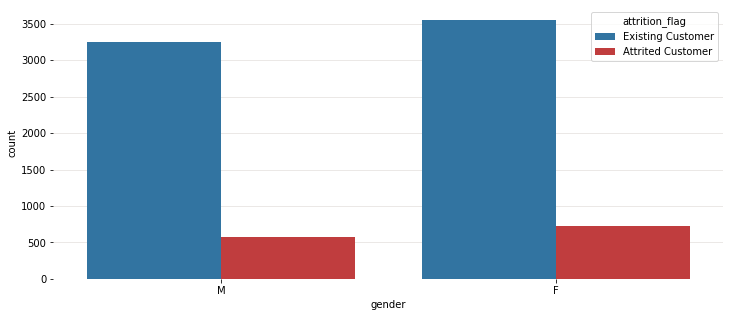

In [254]:
plt.figure(figsize=(12,5))
sns.countplot('gender',data=df,hue='attrition_flag', palette=['tab:blue','tab:red'])
plt.show()

Jika dilihat dari grafik, tidak terlihat perbedaan yang signifikan antara gender pria dan wanita yang mengalami churn

In [255]:
from scipy.stats import chi2_contingency

stat, p, dof, expected = chi2_contingency(pd.crosstab(df.attrition_flag,df.gender))
print('p-value : {}'.format(p))

p-value : 0.022071608985216064


Setelah uji chi-square untuk variabel `gender` dan `attrition_flag`, didapat p-value kurang dari 0.05 yang berarti bahwa tidak ada perbedaan yang signifikan

## 1.4. Lama menjadi customer

In [258]:
def tenure(x):
    if x <= 12:
        return '0-1 year'
    elif x > 12 and x <=24:
        return '1-2 years'
    elif x > 24 and x <=36:
        return '2-3 years'
    elif x > 36 and x <=48:
        return '3-4 years'
    elif x > 48 and x <=56:
        return '4-5 years'
    
df['years_on_book'] = df['months_on_book'].apply(tenure)

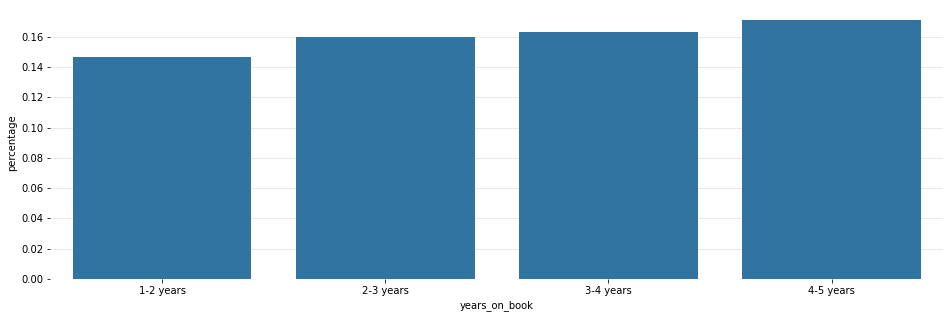

In [259]:
import pandasql

from pandasql import sqldf 
sql_run = lambda q: sqldf(q, globals())

b = df.groupby(['years_on_book','attrition_flag']).count()['user_id'].reset_index()
b['user_id'] = b['user_id'].astype(float)

query = """ 
            WITH table1
            AS
            (
            SELECT 
                years_on_book,
                attrition_flag,
                user_id,
                SUM(user_id) OVER (PARTITION BY years_on_book) as sum
            FROM 
                b
            )
            SELECT *,
                    user_id/sum as percentage
            FROM table1

            """

sns.barplot('years_on_book','percentage',data=sql_run(query)[sql_run(query)['attrition_flag']=='Attrited Customer'], color='tab:blue')
plt.show()

Berdasarkan grafik di atas, nasabah yang sudah lama menggunakan servis memiliki persentase cenderung mengalami churn yang lebih besar dibanding yang lebih sebentar

## 1.5. Interaksi customer dengan Bank

<AxesSubplot:xlabel='contacts_count_12_mon', ylabel='Count'>

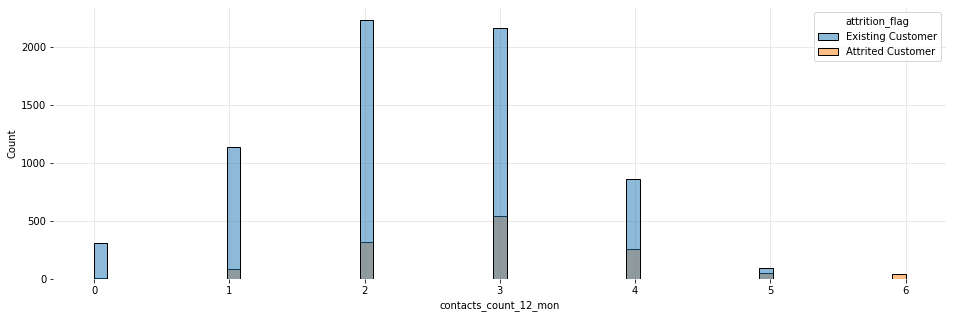

In [260]:
sns.histplot(x='contacts_count_12_mon',hue='attrition_flag',data=df)

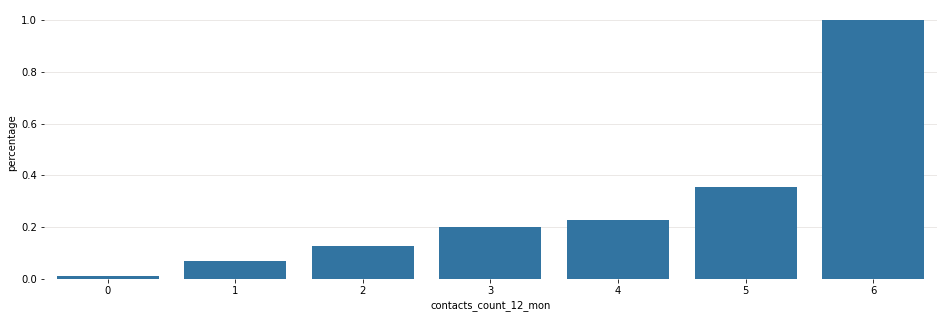

In [261]:
a = df.groupby(['contacts_count_12_mon','attrition_flag']).count()['user_id'].reset_index()
a['user_id'] = a['user_id'].astype(float)

query = """ 
WITH table1
AS
(
SELECT 
    contacts_count_12_mon,
    attrition_flag,
    user_id,
    SUM(user_id) OVER (PARTITION BY contacts_count_12_mon) as sum
FROM 
    a
)
SELECT *,
        user_id/sum as percentage
FROM table1

"""
df_contact = sql_run(query)

sns.barplot('contacts_count_12_mon','percentage',data=df_contact[df_contact['attrition_flag']=='Attrited Customer'],color='tab:blue')
plt.show()

Semakin sering nasabah berinteraksi dengan bank, kemungkinan untuk churnnya semkain besar

# 2

In [262]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif 
from statsmodels.tools.tools import add_constant
import statsmodels.api as sm

In [263]:
card_empty = collections.defaultdict(list)
card_order = ['Blue', 'Silver', 'Gold','Platinum']

for n, level in enumerate(card_order):
    card_empty[level].append(n)

df_new = df.copy()
df_new = df_new[(df_new['education_level']!='Unknown')&(df_new['income_category']!='Unknown')&(df_new['marital_status']!='Unknown')]
df_new = df_new.replace({
                    'education_level':edu_empty,
                    'income_category':inc_empty,
                    'attrition_flag':attrition_empty,
                    'card_category':card_empty,
                    'gender':{'M':1,'F':0}
                   }).drop(['user_id','years_on_book'],axis=1)

df_new1 = pd.get_dummies(df_new,drop_first=True)

In [264]:
X_train_new = df_new1.drop('attrition_flag',axis=1)
y_train_new = df_new1.attrition_flag

In [266]:
scaler = MinMaxScaler()
scaler.fit(X_train_new)

X_train_scaled = scaler.transform(X_train_new)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train_new.columns, index=X_train_new.index)
# X_test_scaled = scaler.transform(X_test)
# X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns,index=X_test.index)

In [273]:
X_m = add_constant(X_train_scaled)

vif_df = pd.DataFrame([vif(X_m.values, i) 
               for i in range(X_m.shape[1])], 
              index=X_m.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
print('Jumlah feature yang memiliki potensi multikolinearitas:',vif_df[vif_df.vif_score>5].shape[0])
vif_df[vif_df.vif_score>4]

Jumlah feature yang memiliki potensi multikolinearitas: 3


,feature,vif_score
11,credit_limit,inf
12,total_revolving_bal,inf
13,avg_open_to_buy,inf


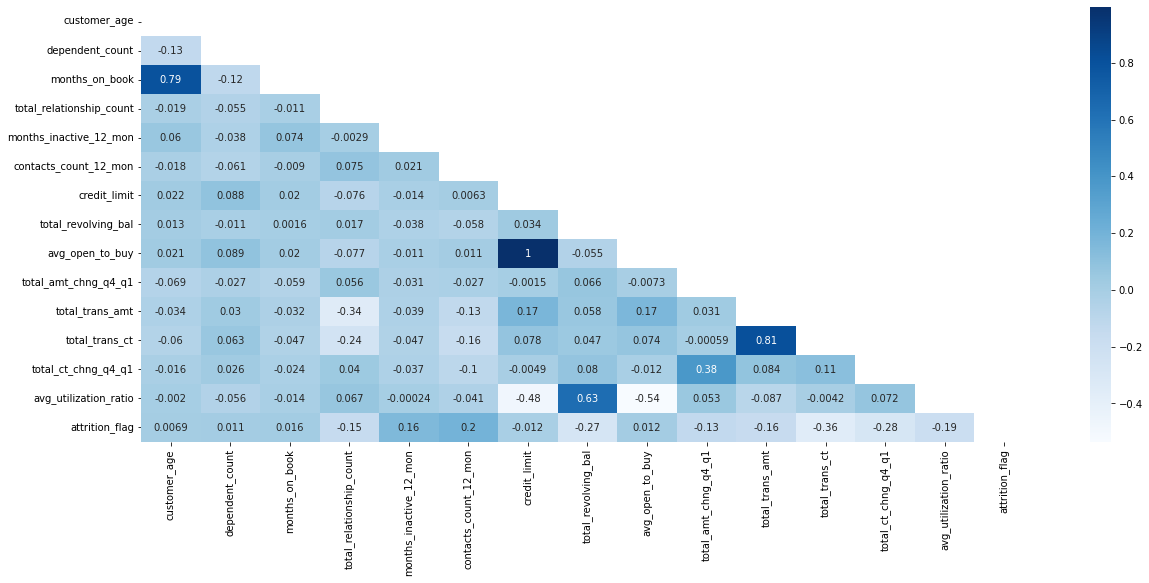

In [298]:
plt.figure(figsize=(20,8))
cat_col = ['gender','education_level','income_category','card_category','marital_status_Married','marital_status_Single']

mask = np.triu(np.ones_like(pd.concat([X_train_scaled.drop(cat_col,axis=1),y_train.replace(attrition_empty)],axis=1).corr(), dtype=bool))
sns.heatmap(pd.concat([X_train_scaled.drop(cat_col,axis=1),y_train.replace(attrition_empty)],axis=1).corr(),annot=True,cmap='Blues',mask=mask)
plt.show()

Need to drop to avoid multicollinearity:
1. customer age
2. avg_open_to_buy
3. total_trans_amt

In [328]:
# column_drop = ['customer_age','avg_open_to_buy','total_trans_amt']

X_test_new = X_test[(X_test['education_level']!='Unknown')&(X_test['income_category']!='Unknown')&(X_test['marital_status']!='Unknown')]
X_test_new = X_test_new.drop(column_drop+['user_id'],axis=1).replace({
                    'education_level':edu_empty,
                    'income_category':inc_empty,
                    'attrition_flag':attrition_empty,
                    'card_category':card_empty,
                    'gender':{'M':1,'F':0}
                   })
X_test_new = pd.get_dummies(X_test_new,'marital_status',drop_first=True)


X_train_new

,gender,dependent_count,education_level,income_category,card_category,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,total_amt_chng_q4_q1,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio,marital_status_Married,marital_status_Single
839,1,4,2,3,0,41,5,3,2,26442.0,1642,0.651,40,0.429,0.062,0,1
90,0,2,1,0,0,36,3,2,2,9930.0,0,0.731,21,1.333,0.000,0,1
8273,1,3,1,2,0,33,2,2,2,20749.0,2171,0.842,77,0.674,0.105,0,0
7406,0,3,2,0,0,47,4,4,2,2577.0,879,0.740,75,0.744,0.341,1,0
8766,0,2,3,0,1,38,2,3,2,10741.0,2517,1.087,71,0.821,0.234,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7043,0,3,1,0,0,36,4,2,1,3007.0,2517,0.733,84,1.000,0.837,1,0
3445,0,5,5,1,0,40,6,1,1,4748.0,1008,0.484,70,0.707,0.212,1,0
5991,1,4,4,2,0,36,3,2,2,3117.0,1400,0.913,85,0.809,0.449,1,0
8568,0,0,3,0,0,19,2,1,2,3261.0,2517,0.636,54,0.742,0.772,1,0


In [312]:
lr = LogisticRegression()
lr.fit(X_train_new, y_train.replace(attrition_empty).loc[X_train_new.index])

LogisticRegression()

In [326]:
from sklearn.metrics import mean_squared_error, f1_score, recall_score

f1_score(y_test.replace(attrition_empty).loc[X_test_new.index],lr.predict(X_test_new))
recall_score(y_test.replace(attrition_empty).loc[X_test_new.index],lr.predict(X_test_new))


0.4194915254237288

839      0
90       0
8273     0
5304     0
7406     0
        ..
3445     0
5991     0
3643     0
8568     1
10051    1
Name: attrition_flag, Length: 8101, dtype: int64

In [290]:
X_test_new

,dependent_count,education_level,income_category,card_category,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,total_amt_chng_q4_q1,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio,marital_status_Married,marital_status_Single
1394,0,3,0,0,55,5,3,4,2492.0,1424,0.485,30,0.364,0.571,1,0
7892,2,3,0,0,36,1,3,3,2780.0,2216,0.826,78,0.857,0.797,1,0
3095,2,1,0,0,24,4,1,0,2799.0,0,0.696,43,0.654,0.000,0,1
2220,1,5,2,0,49,6,2,4,4597.0,2442,0.512,38,0.357,0.531,1,0
97,3,5,1,0,35,5,3,2,3789.0,1706,1.047,42,0.680,0.450,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2473,2,1,0,0,36,6,2,5,8087.0,1263,0.615,69,0.643,0.156,0,1
9622,4,2,3,0,39,3,1,2,11900.0,1796,0.651,101,0.980,0.151,1,0
3889,2,0,3,0,52,1,2,4,3091.0,2517,0.602,49,0.633,0.814,0,1
4321,1,4,2,0,38,4,2,3,2387.0,1482,0.868,67,0.675,0.621,0,1


In [283]:
X_test

,user_id,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio
7230,810986883,45,F,0,High School,Single,Unknown,Blue,40,5,4,0,2557.0,1898,659.0,0.772,4808,83,0.694,0.742
1394,711840408,64,M,0,College,Married,Less than $40K,Blue,55,5,3,4,2492.0,1424,1068.0,0.485,1375,30,0.364,0.571
2967,738627708,49,F,2,Unknown,Single,Unknown,Blue,41,5,3,4,5984.0,0,5984.0,0.551,1838,42,0.556,0.000
7892,721444758,47,F,2,College,Married,Less than $40K,Blue,36,1,3,3,2780.0,2216,564.0,0.826,4980,78,0.857,0.797
6725,720835308,49,F,2,Uneducated,Married,Unknown,Blue,34,6,1,3,3017.0,0,3017.0,0.702,4389,72,0.636,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2473,716456808,36,F,2,High School,Single,Less than $40K,Blue,36,6,2,5,8087.0,1263,6824.0,0.615,2429,69,0.643,0.156
9622,717992433,50,M,4,Graduate,Married,$80K - $120K,Blue,39,3,1,2,11900.0,1796,10104.0,0.651,14666,101,0.980,0.151
3889,781306758,58,M,2,Uneducated,Single,$80K - $120K,Blue,52,1,2,4,3091.0,2517,574.0,0.602,1844,49,0.633,0.814
4321,819363708,43,M,1,Post-Graduate,Single,$60K - $80K,Blue,38,4,2,3,2387.0,1482,905.0,0.868,3909,67,0.675,0.621
